In [2]:
#import the packages
import pandas as pd
import matplotlib.pyplot as myplot
import seaborn as sns
from statsmodels.formula.api import ols
from scipy import stats

In [3]:
#import data
mydata=pd.read_excel(r'C:\Users\SRINJOY\Downloads\Agile_Sprint_Productivity.xlsx')

In [4]:
mydata.head()

,Developer_Skill,Review_Type,Reuse,Sprint_Productivty
0,2-Experienced,Peer,50,0.52
1,2-Experienced,Fagan,70,0.99
2,1-Fresher,Peer,25,0.35
3,1-Fresher,Peer,25,0.19
4,2-Experienced,Peer,50,0.57


In [6]:
#copy variables
dev_exp=mydata.Developer_Skill
rev_type=mydata.Review_Type
reuse=mydata.iloc[:,2]
prod=mydata.Sprint_Productivty

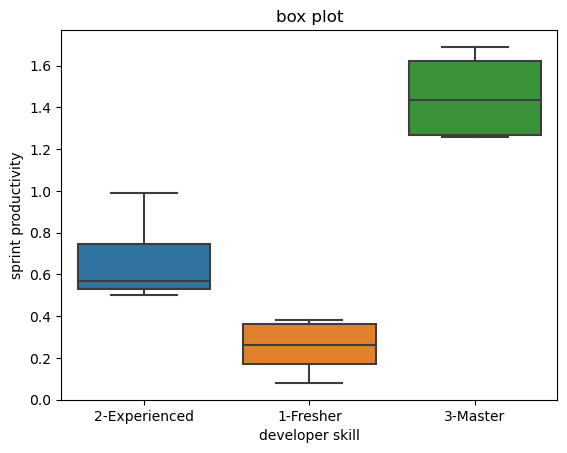

In [7]:
sns.boxplot(x=dev_exp,y=prod)
myplot.title('box plot')
myplot.xlabel('developer skill')
myplot.ylabel('sprint productivity')
myplot.show()

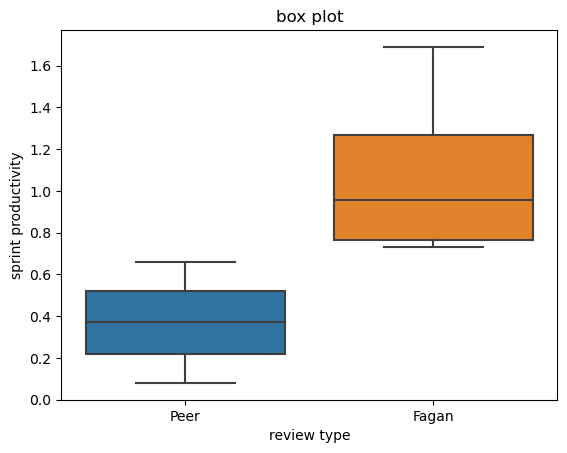

In [8]:
sns.boxplot(x=rev_type,y=prod)
myplot.title('box plot')
myplot.xlabel('review type')
myplot.ylabel('sprint productivity')
myplot.show()

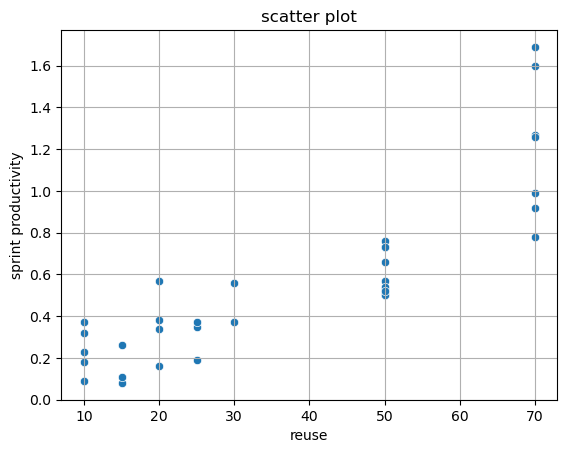

In [9]:
#scatter plot
sns.scatterplot(x=reuse,y=prod)
myplot.title('scatter plot')
myplot.xlabel('reuse')
myplot.ylabel('sprint productivity')
myplot.grid()
myplot.show()

In [10]:
#develop dummy regression model
mymodel=ols('prod~C(dev_exp)+C(rev_type)+reuse',mydata).fit()
mymodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   prod   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     97.69
Date:                Wed, 27 Mar 2024   Prob (F-statistic):           2.15e-16
Time:                        10:56:13   Log-Likelihood:                 28.424
No. Observations:                  34   AIC:                            -46.85
Df Residuals:                      29   BIC:                            -39.22
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       0.4055      0.103      3.939      0.000       0.195       0.616
C(dev_exp)[T.2-Experienced]     0.1989      0.080      2.471      0.020       0.034       0.363
C(dev_exp)[T.3-Master]          0.7999      0.125      6.424      0.000       0.545       1.055
C(rev_type)[T.Peer]            -0.2140      0.070     -3.038      0.005      -0.358      -0.070
reuse                           0.0036      0.002      1.494      0.146      -0.001       0.008
==============================================================================
Omnibus:                        0.957   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.620   Jarque-Bera (JB):                0.817
Skew:                           0.037   Prob(JB):                        0.665
Kurtosis:                       2.244   Cond. No.                         333.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
#remove reuse and redevelop
mymodel=ols('prod~C(dev_exp)+C(rev_type)',mydata).fit()
mymodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   prod   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     124.4
Date:                Wed, 27 Mar 2024   Prob (F-statistic):           5.12e-17
Time:                        10:58:16   Log-Likelihood:                 27.162
No. Observations:                  34   AIC:                            -46.32
Df Residuals:                      30   BIC:                            -40.22
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       0.5228      0.068      7.687      0.000       0.384       0.662
C(dev_exp)[T.2-Experienced]     0.2956      0.049      6.049      0.000       0.196       0.395
C(dev_exp)[T.3-Master]          0.9322      0.089     10.435      0.000       0.750       1.115
C(rev_type)[T.Peer]            -0.2694      0.061     -4.412      0.000      -0.394      -0.145
==============================================================================
Omnibus:                        1.196   Durbin-Watson:                   1.871
Prob(Omnibus):                  0.550   Jarque-Bera (JB):                0.915
Skew:                           0.058   Prob(JB):                        0.633
Kurtosis:                       2.204   Cond. No.                         8.20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
#predicted values
ypred=mymodel.predict()
ypred

array([0.54888889, 0.81833333, 0.25333333, 0.25333333, 0.54888889,
       0.25333333, 0.25333333, 1.455     , 0.81833333, 0.25333333,
       0.25333333, 0.54888889, 0.81833333, 0.25333333, 0.25333333,
       0.81833333, 0.54888889, 0.54888889, 1.455     , 0.25333333,
       1.455     , 0.25333333, 0.54888889, 0.25333333, 0.25333333,
       0.54888889, 0.54888889, 0.25333333, 0.25333333, 0.54888889,
       1.455     , 0.81833333, 0.81833333, 0.25333333])

In [13]:
#residuals
res=mymodel.resid
res

0    -0.028889
1     0.171667
2     0.096667
3    -0.063333
4     0.021111
5    -0.173333
6     0.006667
7     0.235000
8     0.101667
9    -0.163333
10    0.116667
11    0.021111
12   -0.088333
13    0.066667
14    0.116667
15   -0.058333
16    0.011111
17   -0.048889
18    0.145000
19   -0.143333
20   -0.185000
21   -0.073333
22   -0.048889
23    0.116667
24    0.126667
25   -0.008889
26    0.111111
27   -0.093333
28   -0.023333
29   -0.028889
30   -0.195000
31   -0.088333
32   -0.038333
33    0.086667
dtype: float64

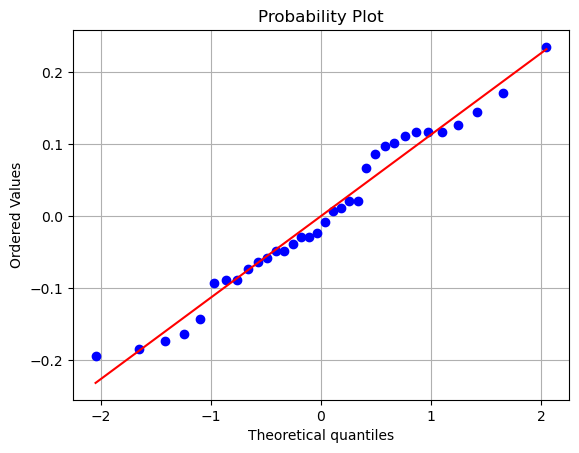

In [14]:
#normality of residual
stats.probplot(res,plot=myplot)
myplot.grid()
myplot.show()